# Machine Learning Part 2

## This script contains the following:¶

### 1. Importing libraries and data and renaming columns¶

### 2. The elbow technique

### 3. k-means clustering

## Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs created are displayed in the notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'/Users/alejandroguillen/Documents/Airbnb'

In [4]:
df = pd.read_csv(os.path.join(path,'Data','Prepared', 'Airbnb_listings.csv'), index_col=False)

In [5]:
df.head()

,listing_id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,5121,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,12/2/19,0,2,0,0
1,2595,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,6/21/22,0,3,325,1
2,14991,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,5/14/23,0,1,268,3
3,5136,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,8/10/22,0,1,275,1
4,59709,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,4/28/23,0,1,38,23


In [6]:
#Creating a subset with only numeric data

df_1 = df.drop(columns=['listing_id', 'name', 'host_id','host_name','neighbourhood_group','neighbourhood', 'latitude','longitude','room_type','last_review'], axis=1)

In [7]:
df_1

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,60,30,50,0,2,0,0
1,240,30,49,0,3,325,1
2,120,5,22,0,1,268,3
3,276,21,3,0,1,275,1
4,325,7,69,0,1,38,23
...,...,...,...,...,...,...,...
43536,208,3,0,0,3,358,0
43537,530,30,0,0,1,270,0
43538,382,30,0,0,132,288,0
43539,199,2,0,0,1,155,0


In [8]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43541 entries, 0 to 43540
Data columns (total 7 columns):
 #   Column                          Non-Null Count  Dtype
---  ------                          --------------  -----
 0   price                           43541 non-null  int64
 1   minimum_nights                  43541 non-null  int64
 2   number_of_reviews               43541 non-null  int64
 3   reviews_per_month               43541 non-null  int64
 4   calculated_host_listings_count  43541 non-null  int64
 5   availability_365                43541 non-null  int64
 6   number_of_reviews_ltm           43541 non-null  int64
dtypes: int64(7)
memory usage: 2.3 MB


### 2. Elbow Technique

In [9]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [10]:
score = [kmeans[i].fit(df_1).score(df_1) for i in range(len(kmeans))] # Creates a score that represents 
# a rate of variation for the given cluster option.

score

/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/threadpoolctl.py:1010: RuntimeWarning: 
Found Intel OpenMP ('libiomp') and LLVM OpenMP ('libomp') loaded at
the same time. Both libraries are known to be incompatible and this
can cause random crashes or deadlocks on Linux when loaded in the
same Python program.
Using threadpoolctl may cause crashes or deadlocks. For more
information and possible workarounds, please see
    https://github.com/joblib/threadpoolctl/blob/master/multiple_openmp.md

  warnings.warn(msg, RuntimeWarning)
/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change fro

[-30645065849.376446,
 -10504757457.795574,
 -5698787049.585573,
 -3820476836.013185,
 -3110296277.898733,
 -2489575035.6513467,
 -2014505074.6008124,
 -1706866016.401302,
 -1459675079.8778903]

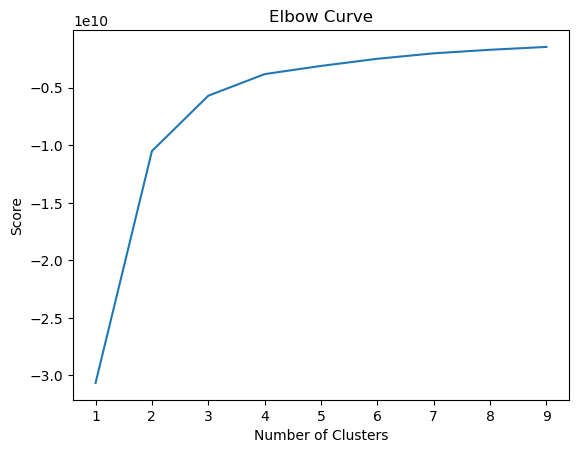

In [11]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Note: there is a large jump from two to three on the x-axis, but after that, the curve straightens out. This means that the optimal count for your clusters is three.

### 3. K-means clustering 

In [12]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 3) 

In [13]:
# Fit the k-means object to the data.

kmeans.fit(df_1)

/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [14]:
df_1['clusters'] = kmeans.fit_predict(df_1)

/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [15]:
df_1.head()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,clusters
0,60,30,50,0,2,0,0,0
1,240,30,49,0,3,325,1,0
2,120,5,22,0,1,268,3,0
3,276,21,3,0,1,275,1,0
4,325,7,69,0,1,38,23,0


In [16]:
df_1['clusters'].value_counts()

0    43467
2       70
1        4
Name: clusters, dtype: int64

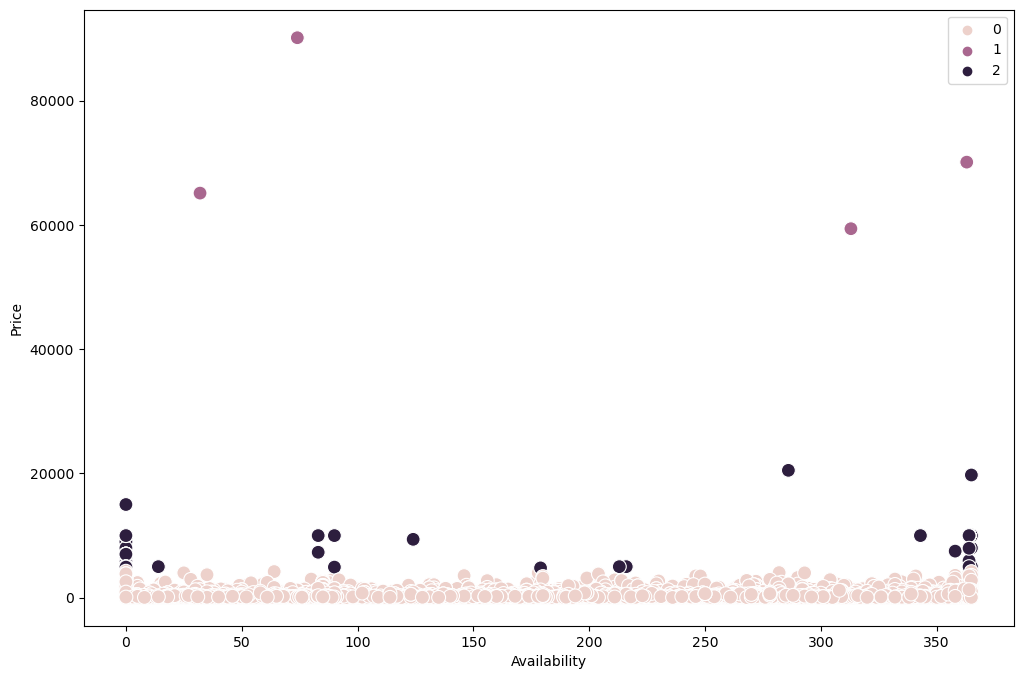

In [17]:
# Plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['availability_365'], y=df_1['price'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Availability') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Note: it is shown that  price and availability are not influecing each other very much. It seems that availability is very independent. Nevetherless, is important to notice that though most prices are present during the whole year, it seems that some high prices are more present all year long.

In [18]:
df_2 =pd.read_csv(os.path.join(path,'Data','Prepared', 'final_listings.csv'), index_col=False)

In [19]:
df_2.describe()

,Unnamed: 0,id,host_id,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,42569.000000,4.256900e+04,4.256900e+04,42569.000000,42569.000000,42569.000000,42569.000000,42569.000000,32683.000000,42569.000000,42569.000000,42569.000000
mean,21617.279805,2.537027e+17,1.540645e+08,40.728411,-73.943146,175.907327,18.865090,26.764242,1.223659,29.934577,136.012826,8.007987
std,12533.112817,3.585198e+17,1.643116e+08,0.057916,0.056524,142.717445,27.752473,58.158317,1.780813,98.327900,137.001699,18.397894
min,0.000000,2.595000e+03,1.678000e+03,40.500314,-74.249840,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,10757.000000,1.997990e+07,1.621106e+07,40.687300,-73.981320,80.000000,2.000000,1.000000,0.130000,1.000000,0.000000,0.000000
50%,21582.000000,4.533160e+07,7.642669e+07,40.723830,-73.952060,133.000000,21.000000,5.000000,0.550000,1.000000,88.000000,1.000000
75%,32384.000000,6.722890e+17,2.741182e+08,40.762930,-73.923290,220.000000,30.000000,25.000000,1.810000,4.000000,278.000000,8.000000
max,43540.000000,9.059750e+17,5.180219e+08,40.911380,-73.710870,950.000000,1250.000000,2024.000000,63.950000,569.000000,365.000000,1128.000000


In [20]:
df_2.head()

,Unnamed: 0,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,5121.0,Rental unit in Brooklyn · ★4.52 · 1 bedroom · ...,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,12/2/19,0.29,2,0,0
1,1,2595.0,Rental unit in New York · ★4.68 · Studio · 1 b...,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,240,30,49,6/21/22,0.30,3,325,1
2,2,14991.0,Rental unit in New York · ★4.93 · 1 bedroom · ...,59023,Bianca,Manhattan,Lower East Side,40.72207,-73.98976,Private room,120,5,22,5/14/23,0.14,1,268,3
3,3,5136.0,Rental unit in Brooklyn · ★5.0 · 2 bedrooms · ...,7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,276,21,3,8/10/22,0.03,1,275,1
4,4,59709.0,Rental unit in New York · ★4.77 · 2 bedrooms ·...,186084,Ricardo & Ashlie,Manhattan,Chinatown,40.71780,-73.99320,Entire home/apt,325,7,69,4/28/23,0.47,1,38,23


In [21]:
#df_2 = df_2.drop(['cluster'], axis=1)

In [22]:
#df_2 = df_2.drop(columns=['id', 'name', 'host_id','host_name','neighbourhood_group','neighbourhood', 'latitude','longitude','room_type','last_review'], axis=1)
df_3=pd.DataFrame().assign(price=df_2['price'], availability_365=df_2['availability_365'])

In [23]:
df_3.head()

,price,availability_365
0,60,0
1,240,325
2,120,268
3,276,275
4,325,38


In [24]:
# Create the k-means object.

kmeans_2 = KMeans(n_clusters = 3) 

In [25]:
# Fit the k-means object to the data.

kmeans_2.fit(df_3)

/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=3)

In [26]:
df_3['clusters'] = kmeans_2.fit_predict(df_3)

/Users/alejandroguillen/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


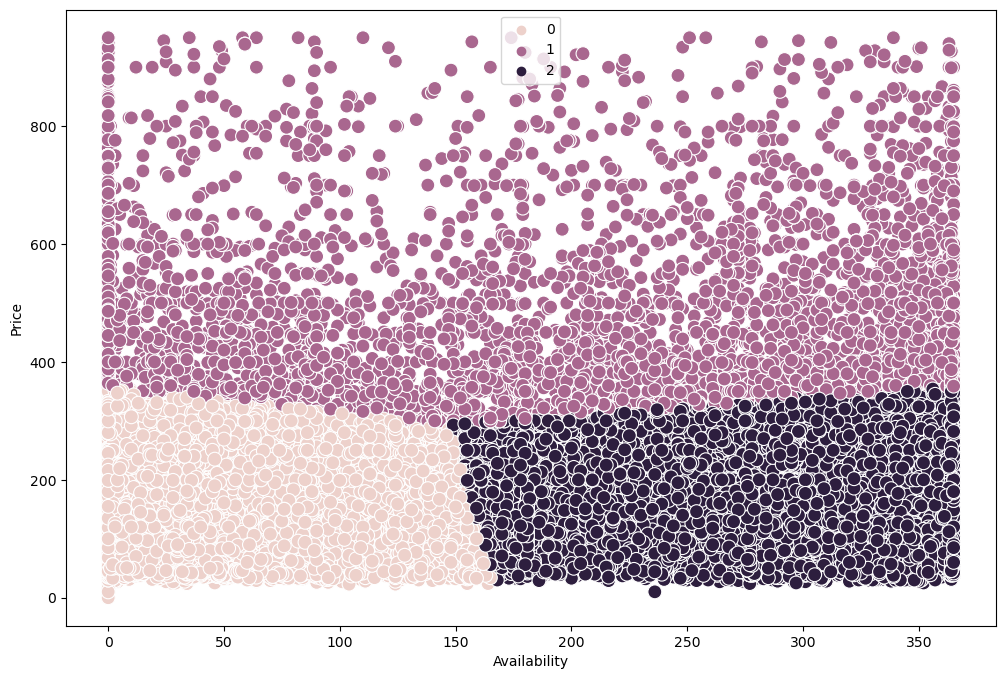

In [27]:
# Plot the clusters 

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_3['availability_365'], y=df_3['price'], hue=kmeans_2.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Availability') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Note: data free of price outliers was used for the K-means clustering model. The test now shows three groups of clusters (from bottom to top):  1) Low/ Medium price - Low/Medium availability (light pink). 2) Low/ Medium price - Medium/High availability (Dark purple). 3) Medium/High price - All year long availability (light purple).

In [28]:
df_3.describe()

,price,availability_365,clusters
count,42569.000000,42569.000000,42569.000000
mean,175.907327,136.012826,0.804881
std,142.717445,137.001699,0.920687
min,0.000000,0.000000,0.000000
25%,80.000000,0.000000,0.000000
50%,133.000000,88.000000,0.000000
75%,220.000000,278.000000,2.000000
max,950.000000,365.000000,2.000000


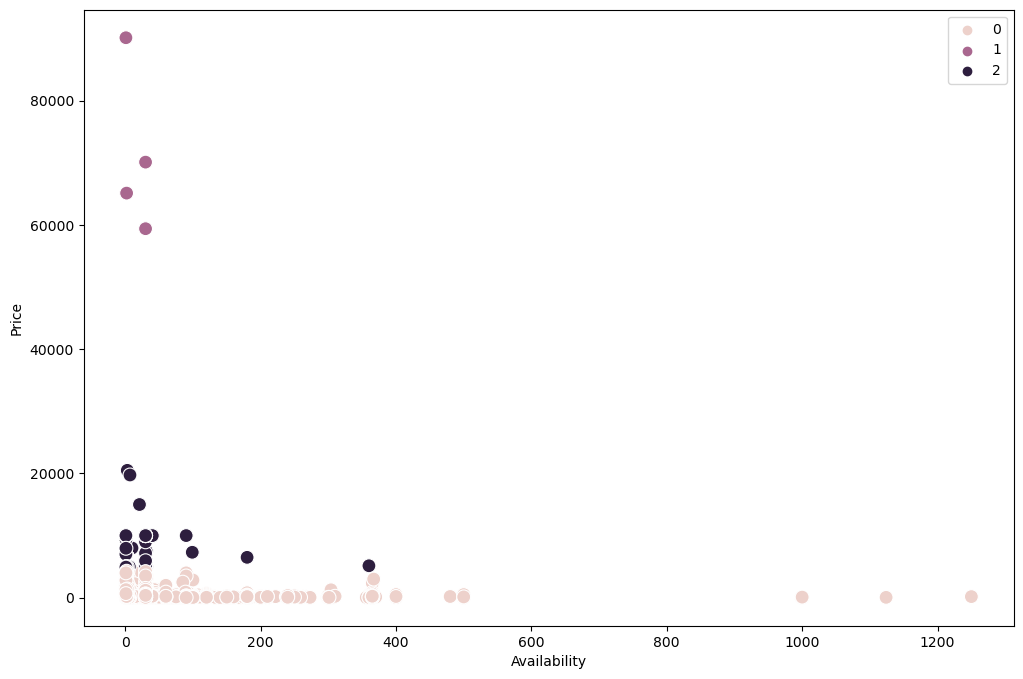

In [29]:
plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_1['minimum_nights'], y=df_1['price'], hue=kmeans.labels_, s=100) 


ax.grid(False) # This removes the grid from the background.
plt.xlabel('Availability') # Label x-axis.
plt.ylabel('Price') # Label y-axis.
plt.show()

#### Note: minimum nights and prices seem not to have a lot of correlation either. Though there is a group (dark purple) that would be interesting to analize more carefully.

In [30]:
df.loc[df_1['clusters'] == 2, 'cluster'] = 'dark purple'
df.loc[df_1['clusters'] == 1, 'cluster'] = 'purple'
df.loc[df_1['clusters'] == 0, 'cluster'] = 'pink'

In [31]:
df.groupby('cluster').agg({'price':['mean', 'median'], 
                         'minimum_nights':['mean', 'median'], 
                         'number_of_reviews':['mean', 'median'],
                          'reviews_per_month':['mean', 'median'],
                          'calculated_host_listings_count':['mean', 'median'],
                          'availability_365':['mean', 'median'],
                          'number_of_reviews_ltm':['mean', 'median']})

price          minimum_nights        number_of_reviews  \
                     mean   median           mean median              mean   
cluster                                                                      
dark purple   8497.800000   9693.5      22.957143    3.0          4.528571   
pink           205.411347    136.0      18.691720   15.0         26.402236   
purple       71180.250000  67607.5      15.750000   16.0         16.250000   

                   reviews_per_month        calculated_host_listings_count  \
            median              mean median                           mean   
cluster                                                                      
dark purple    0.0          0.014286    0.0                      21.142857   
pink           5.0          0.672533    0.0                      30.970000   
purple         4.5          0.000000    0.0                       2.500000   

                   availability_365        number_of_reviews_ltm         
            median             mean median                  mean median  
cluster                                                                  
dark purple    3.0       191.085714  214.5              0.728571    0.0  
pink           1.0       136.942646   89.0              7.895461    1.0  
purple         2.5       195.500000  193.5              1.750000    1.0

#### Note: the data for this project is not very usable to test in machine learning algorithms. It seems that variables that we would think are relevant (like price and availability) are not very correlated to each other.